In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import torch
import json
import plotly.express as px
from transformer_lens import utils
from datasets import load_dataset


import matplotlib.pyplot as plt
import seaborn as sns

from error_eval import *
from plots import *
torch.set_grad_enabled(False)

/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.2.1) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
pos = 'all'
layers = list(range(12))
sae_name = 'gpt2_resid'

result_dfs = {}
for i in layers:
    data_path = os.path.join(
        'error_eval_results',
        sae_name,
        f'layer_{i}_pos_{pos}.csv',
    )
    result_dfs[i] = pd.read_csv(data_path)

In [4]:
result_dfs[4]

token  position      loss  substitution_loss  substitution_kl  \
0        50256         0  8.604523           8.611563         0.001794   
1        17402         1  4.787953           4.991229         0.023384   
2        22038         2  3.174028           2.574388         0.094981   
3         4870         3  2.832820           3.350013         0.115174   
4         7806         4  0.000286           0.002920         0.002046   
...        ...       ...       ...                ...              ...   
2031995   3936       122  2.626946           2.761653         0.013941   
2031996    329       123  0.903635           1.012223         0.042977   
2031997    257       124  2.422072           2.810656         0.063245   
2031998   1178       125  1.207361           1.108215         0.027193   
2031999   2745       126  1.547133           1.549773         0.038615   

         norm_corrected_substitution_loss  norm_corrected_substitution_kl  \
0                                8.641123                        0.001052   
1                                4.870447                        0.031064   
2                                2.588204                        0.096537   
3                                3.415127                        0.126341   
4                                0.003096                        0.002206   
...                                   ...                             ...   
2031995                          2.768889                        0.014410   
2031996                          1.027988                        0.040416   
2031997                          2.808385                        0.058674   
2031998                          1.101655                        0.028294   
2031999                          1.586746                        0.040333   

         cos_corrected_substitution_loss  cos_corrected_substitution_kl  \
0                               8.572298                   6.845774e-04   
1                               4.938009                   2.490914e-03   
2                               3.166154                   8.283695e-05   
3                               2.772916                   6.018225e-04   
4                               0.000284                   2.813412e-07   
...                                  ...                            ...   
2031995                         2.639417                   3.829615e-04   
2031996                         0.874306                   1.179026e-03   
2031997                         2.433435                   4.411159e-04   
2031998                         1.217999                   3.637176e-04   
2031999                         1.520233                   2.540089e-04   

         l2_error_preserving_substitution_loss  ...  zero_ablation_loss  \
0                                     8.576875  ...           23.252796   
1                                     4.396870  ...           28.889675   
2                                     2.959094  ...           26.934467   
3                                     3.253842  ...           17.546122   
4                                     0.000970  ...           22.332176   
...                                        ...  ...                 ...   
2031995                               2.480404  ...            9.582205   
2031996                               0.961037  ...           11.698619   
2031997                               2.745543  ...           27.399527   
2031998                               1.330893  ...           25.806316   
2031999                               1.608654  ...           11.523491   

         zero_ablation_kl  mean_ablation_loss  mean_ablation_kl  sae_l0  \
0                6.702333           20.873650          7.529308    11.0   
1                5.925323           17.217062          7.271905    15.0   
2               21.671558           11.382118          8.054785    26.0   
3               18.050423           15.302921         12.897068    32.0   
4               22

In [5]:
kl_col_labels = {
    'substitution_kl': 'SAE(x)',
    'norm_corrected_substitution_kl': 'norm corrected SAE(x)',
    'cos_corrected_substitution_kl': '$(\|x_{SAE}\| / \|x\|) * x$',
    'l2_error_preserving_substitution_kl': '$\epsilon$-random',
    'cos_preserving_substitution_w_sae_norm_kl': '$\\theta$-random w/ SAE norm',
    'cos_preserving_substitution_w_true_norm_kl': '$\\theta$-random w/ true norm'
}

kl_main_cols = ['substitution_kl', 'l2_error_preserving_substitution_kl', 'cos_corrected_substitution_kl']


Text(0.5, 1.02, 'Average KL divergence of prediction with residual stream substitution (all tokens; 1 layer)')

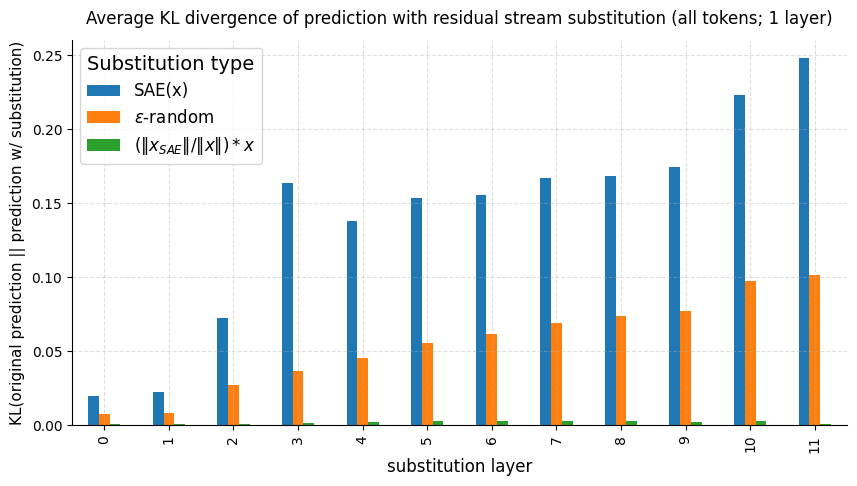

In [6]:
from plots import *
kl_main_cols = ['substitution_kl', 'l2_error_preserving_substitution_kl', 'cos_corrected_substitution_kl']
fig, ax = plot_layerwise_kl_average(result_dfs, list(range(12)), kl_main_cols, kl_col_labels)
ax.set_title('Average KL divergence of prediction with residual stream substitution (all tokens; 1 layer)', y=1.02)

Text(0.5, 1.02, 'Average KL divergence of prediction with residual stream substitution (all tokens; 1 layer)')

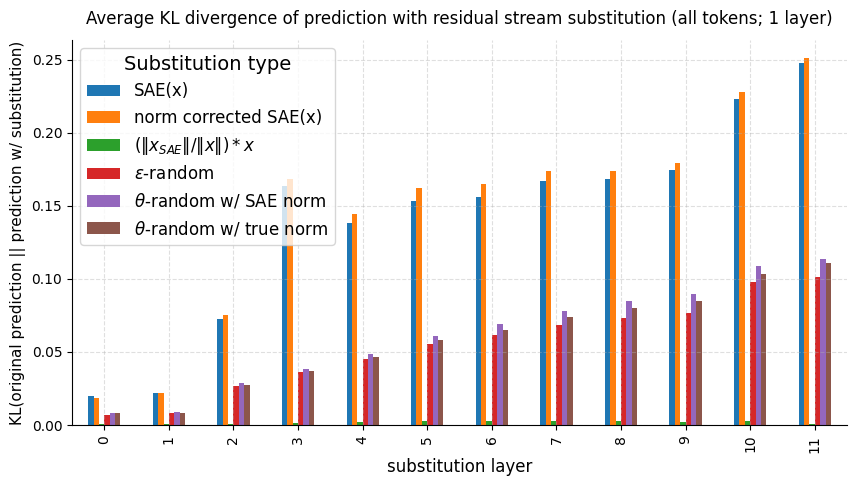

In [7]:
from plots import *
kl_all_cols = list(kl_col_labels.keys())
fig, ax = plot_layerwise_kl_average(result_dfs, list(range(12)), kl_all_cols, kl_col_labels)
ax.set_title('Average KL divergence of prediction with residual stream substitution (all tokens; 1 layer)', y=1.02)

In [8]:
mean_df['substitution_kl'] / mean_df['l2_error_preserving_substitution_kl']

NameError: name 'mean_df' is not defined

In [7]:
loss_col_labels = {
    'substitution_loss': 'SAE(x)',
    'norm_corrected_substitution_loss': 'norm corrected SAE(x)',
    'cos_corrected_substitution_loss': '$(\|x_{SAE}\| / \|x\|) * x$',
    'l2_error_preserving_substitution_loss': '$\epsilon$-random',
    'cos_preserving_substitution_w_sae_norm_loss': '$\\theta$-random w/ SAE norm',
    'cos_preserving_substitution_w_true_norm_loss': '$\\theta$-random w/ true norm'
}

loss_main_cols = ['substitution_loss', 'l2_error_preserving_substitution_loss', 'cos_corrected_substitution_loss']


Text(0.5, 1.02, 'Mean cross-entropy loss difference with residual stream substitution (all tokens; 1 layer)')

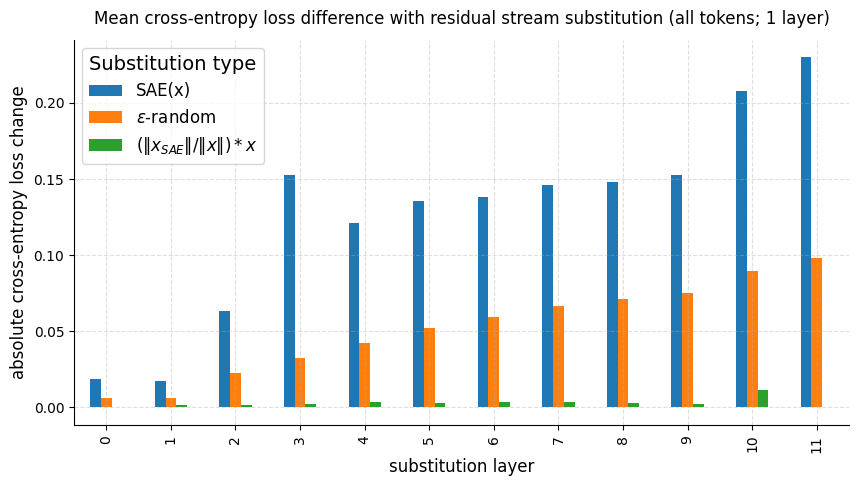

In [19]:
from plots import *
fig, ax, loss_mean_df = plot_layerwise_average_loss_increase(result_dfs, list(range(12)), loss_main_cols, loss_col_labels)
ax.set_title('Mean cross-entropy loss difference with residual stream substitution (all tokens; 1 layer)', y=1.02)

In [17]:
loss_mean_df['substitution_loss_increase'] / loss_mean_df['l2_error_preserving_substitution_loss_increase']

0     3.033061
1     2.877437
2     2.766423
3     4.686720
4     2.871828
5     2.609725
6     2.319485
7     2.181723
8     2.080060
9     2.035813
10    2.313730
11    2.344639
dtype: float64

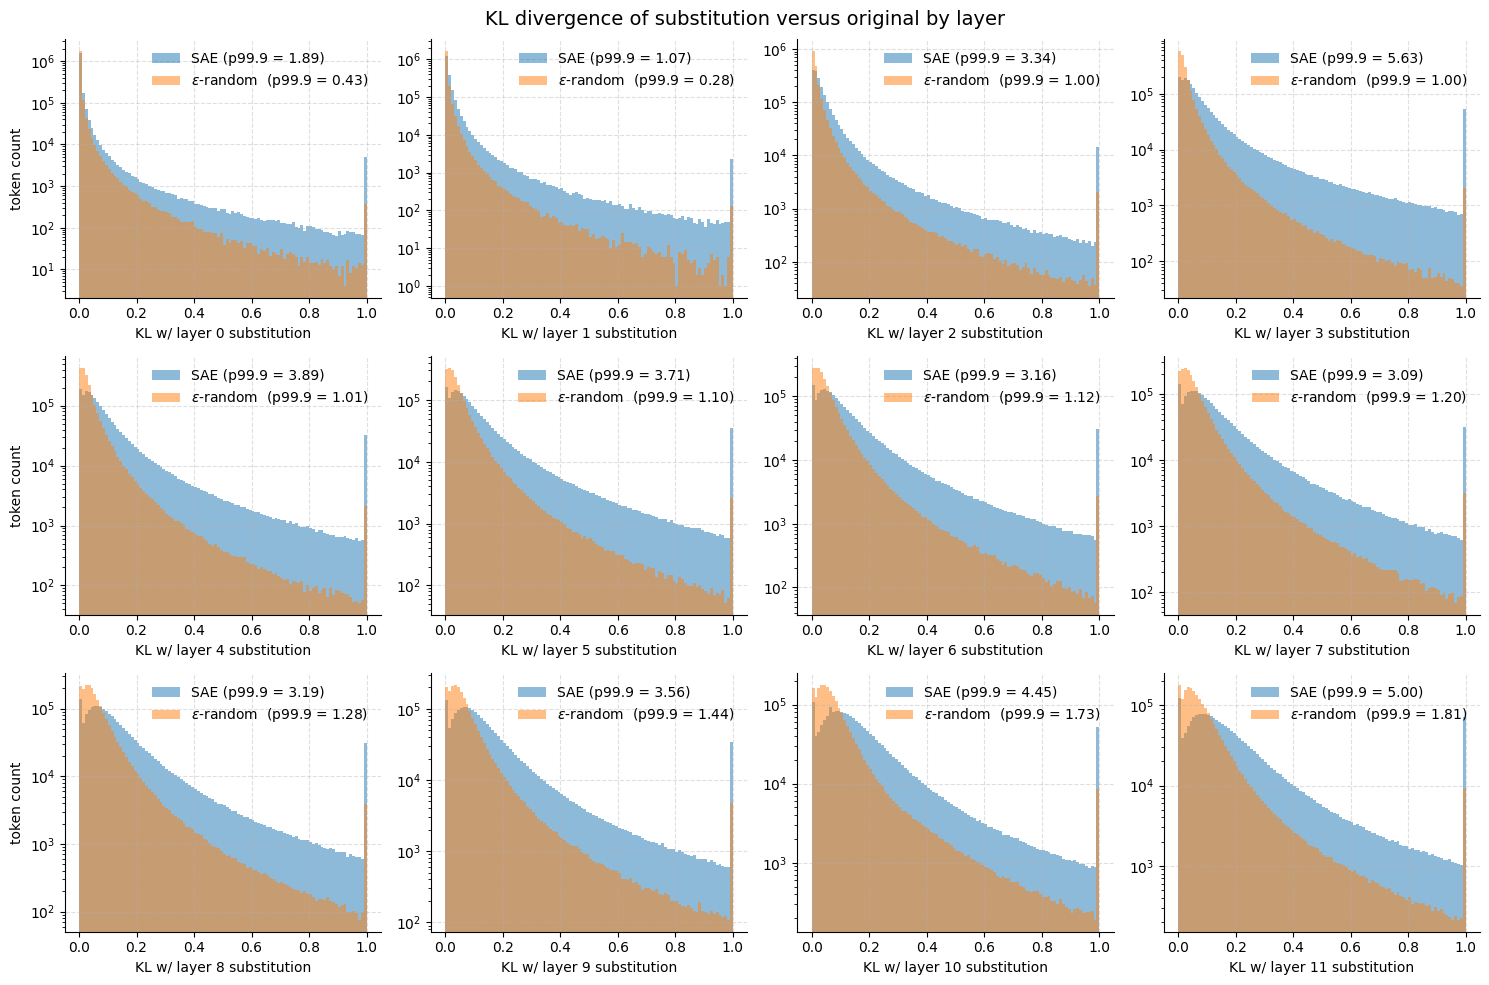

In [26]:
fig, axs = plt.subplots(3, 4, figsize=(15, 10))

ub = 1
for i in range(12):
    ax = axs[i // 4, i % 4]
    rdf = result_dfs[i]
    
    sae_p99 = np.percentile(rdf['substitution_kl'], 99.9)
    random_p99 = np.percentile(rdf['l2_error_preserving_substitution_kl'], 99.9)
    
    ax.hist(np.clip(rdf['substitution_kl'], 0, ub), bins=100, alpha=0.5, label=f'SAE (p99.9 = {sae_p99:.2f})')
    ax.hist(np.clip(rdf['l2_error_preserving_substitution_kl'], 0, ub), bins=100, alpha=0.5, label=f'$\epsilon$-random  (p99.9 = {random_p99:.2f})')
    
    ax.set_yscale('log')
    ax.legend(loc='upper right', frameon=False)
    ax.set_xlabel(f'KL w/ layer {i} substitution')
    
    if i % 4 == 0:
        ax.set_ylabel('token count')
        
    format_subplot(ax)
    
plt.suptitle('KL divergence of substitution versus original by layer', fontsize=14)
plt.tight_layout()  


In [14]:
from plots import *

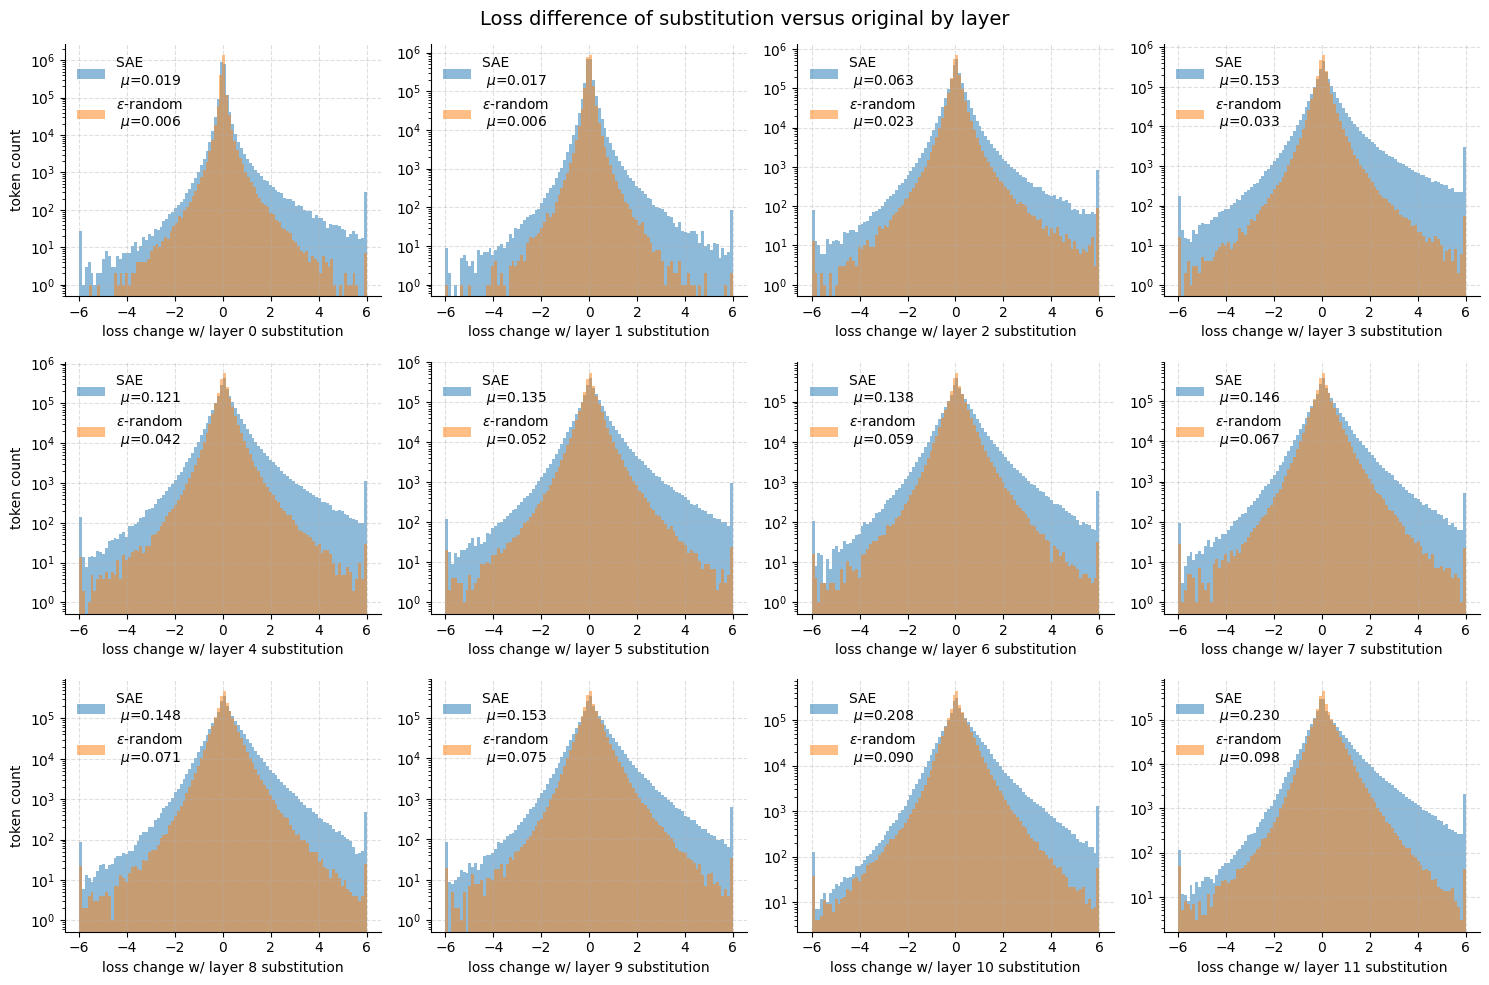

In [27]:
fig, axs = plt.subplots(3, 4, figsize=(15, 10))

lb, ub = (-6, 6)
for i in range(12):
    ax = axs[i // 4, i % 4]
    rdf = result_dfs[i]
    substitution_loss_change = np.clip(rdf['substitution_loss'] - rdf['loss'], lb, ub)
    random_loss_change = np.clip(rdf['l2_error_preserving_substitution_loss'] - rdf['loss'], lb, ub)
    
    sub_loss_change_mean = (rdf['substitution_loss'] - rdf['loss']).mean()
    rand_loss_change_mean = (rdf['l2_error_preserving_substitution_loss'] - rdf['loss']).mean()
    
    ax.hist(substitution_loss_change, bins=100, alpha=0.5, label=f'SAE \n $\mu$={sub_loss_change_mean:.3f}')
    ax.hist(random_loss_change, bins=100, alpha=0.5, label=f'$\epsilon$-random \n $\mu$={rand_loss_change_mean:.3f}')
    
    ax.legend(loc='upper left', frameon=False)
    ax.set_yscale('log')
    ax.set_xlabel(f'loss change w/ layer {i} substitution')
    if i % 4 == 0:
        ax.set_ylabel('token count')
    
    format_subplot(ax)
    
plt.suptitle('Loss difference of substitution versus original by layer', fontsize=14)
plt.tight_layout()  

Text(0.5, 1.05, 'Average KL divergence of substitution versus original by position')

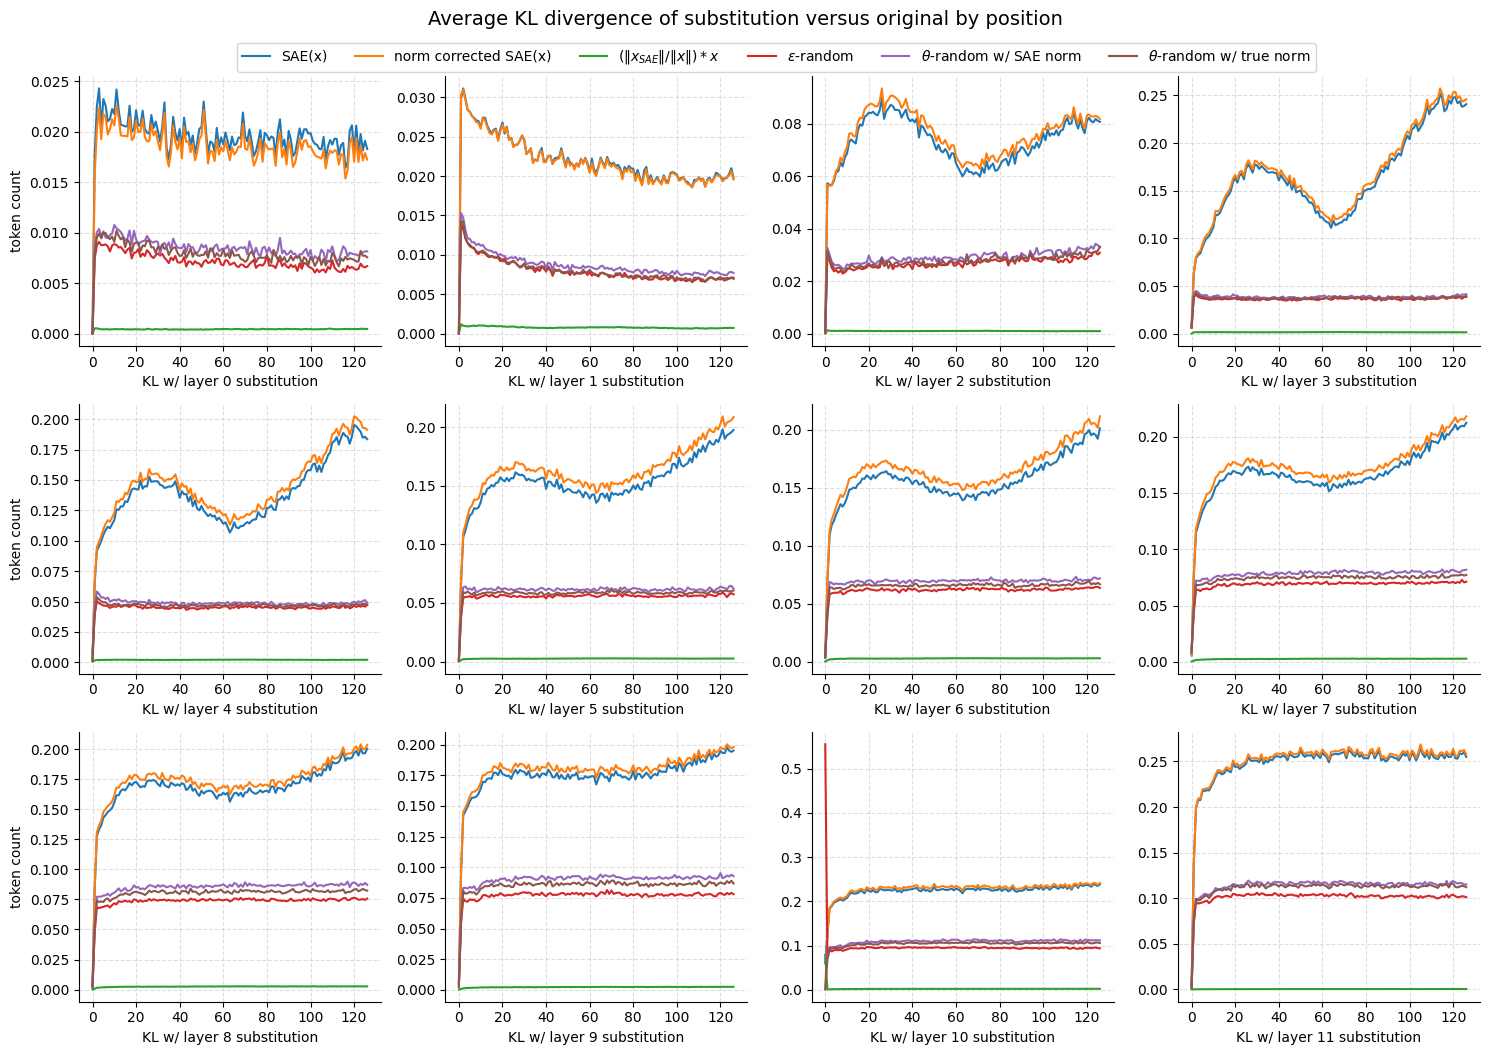

In [38]:
fig, axs = plt.subplots(3, 4, figsize=(15, 10))

for i in range(12):
    ax = axs[i // 4, i % 4]
    rdf = result_dfs[i]
    kl_by_pos = rdf.groupby('position')[[c for c in rdf.columns if 'kl' in c and 'zero' not in c and 'mean' not in c]].mean()

    for c in kl_by_pos.columns:
        ax.plot(kl_by_pos.index, kl_by_pos[c], label=kl_col_labels[c])
    format_subplot(ax)
    
    ax.set_xlabel(f'KL w/ layer {i} substitution')
    if i % 4 == 0:
        ax.set_ylabel('token count')
    
plt.tight_layout()
axs[0, 0].legend(loc='upper left', bbox_to_anchor=(0.5, 1.15), ncol=6)
plt.suptitle('Average KL divergence of substitution versus original by position', fontsize=14, y=1.05)

In [29]:
kl_by_pos

substitution_kl  norm_corrected_substitution_kl  \
position                                                    
0                0.001701                        0.001696   
1                0.137543                        0.138007   
2                0.198259                        0.199509   
3                0.207776                        0.209323   
4                0.207625                        0.209340   
...                   ...                             ...   
122              0.253052                        0.256145   
123              0.258730                        0.261644   
124              0.258041                        0.261303   
125              0.259886                        0.262617   
126              0.254983                        0.257453   

          cos_corrected_substitution_kl  l2_error_preserving_substitution_kl  \
position                                                                       
0                          7.983544e-08                             0.002329   
1                          1.111464e-04                             0.072714   
2                          1.968510e-04                             0.095711   
3                          2.207085e-04                             0.094155   
4                          2.363889e-04                             0.094836   
...                                 ...                                  ...   
122                        4.845798e-04                             0.101197   
123                        4.948106e-04                             0.101296   
124                        5.016929e-04                             0.102260   
125                        4.934162e-04                             0.101894   
126                        4.957394e-04                             0.101119   

          cos_preserving_substitution_w_sae_norm_kl  \
position                                              
0                                          0.002375   
1                                          0.075253   
2                                          0.099508   
3                                          0.098925   
4                                          0.101072   
...                                             ...   
122                                        0.115996   
123                                        0.116708   
124                                        0.116615   
125                                        0.115011   
126                                        0.115146   

          cos_preserving_substitution_w_true_norm_kl  
position                                              
0                                           0.002383  
1                                           0.074313  
2                                           0.099142  
3                                           0.097642  
4                                           0.098137  
...                                              ...  
122                                         0.111839  
123                                         0.112809  
124                                         0.113711  
125                                         0.113136  
126                                         0.112234  

[127 rows x 6 columns]

In [ ]:
layer = 6
rdf = result_dfs[layer]

In [ ]:
rdf['kl_gap'] = rdf['substitution_kl'] - rdf['l2_error_preserving_substitution_kl']

In [97]:
kl_gap_df = pd.DataFrame({
    f'{layer}': rdf['substitution_kl'] - rdf['l2_error_preserving_substitution_kl']
    for layer, rdf in result_dfs.items()
})

Text(0.5, 1.0, 'KL gap correlation between layers')

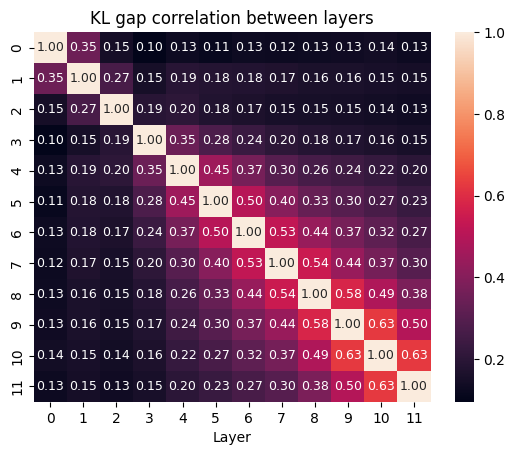

In [99]:
# heatmap with annotations with two sig digits and smaller size
sns.heatmap(kl_gap_df.corr(), annot=True, fmt=".2f", annot_kws={"size": 9})
plt.xlabel('Layer')
plt.title('KL gap correlation between layers')

<Axes: xlabel='position'>

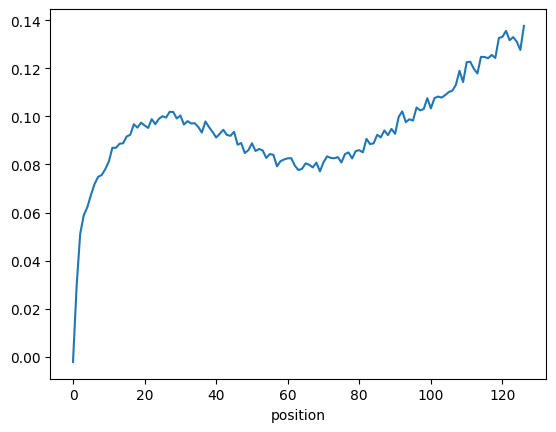

In [ ]:
rdf.groupby('position').kl_gap.mean().plot()

In [30]:
rdf = result_dfs[6]

rdf['abs_kl_gap'] = rdf['substitution_kl'] - rdf['l2_error_preserving_substitution_kl']
rdf['relative_kl_gap'] = (rdf['substitution_kl'] - rdf['l2_error_preserving_substitution_kl']) / (rdf['l2_error_preserving_substitution_kl'] + 1e-5)

In [31]:
kl_gap_corr = rdf.corr()[['abs_kl_gap', 'relative_kl_gap']]

In [33]:
kl_gap_corr.iloc[:-2].style.background_gradient(cmap='coolwarm', axis=0)

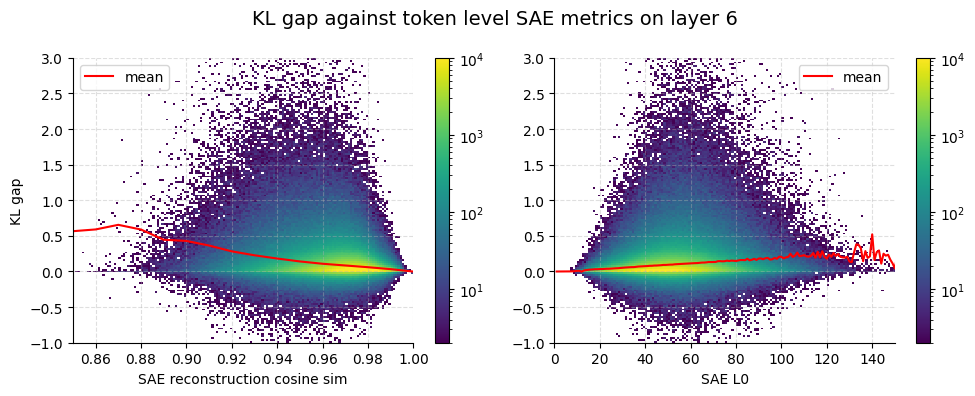

In [81]:
import matplotlib.colors as colors
from plots import format_subplot


fig, axs = plt.subplots(1, 2, figsize=(10, 4))
ax = axs[0]
hist = ax.hist2d(rdf['cos'], rdf['abs_kl_gap'], bins=150, range=((0.85, 1), (-1, 3)), 
                 norm=colors.LogNorm(vmin=2, vmax=1e4), cmin=2)
fig.colorbar(hist[3], ax=ax)

rdf['round_cos'] = rdf['cos'].round(2)
rdf.groupby('round_cos').abs_kl_gap.mean().plot(ax=ax, color='red', label='mean')
ax.legend(loc='upper left')

ax.set_xlim(0.85, 1)

format_subplot(ax)
ax.set_xlabel('SAE reconstruction cosine sim')
ax.set_ylabel('KL gap')

ax = axs[1]
hist = ax.hist2d(rdf['sae_l0'], rdf['abs_kl_gap'], bins=150, range=((0, 150), (-1, 3)), 
                 norm=colors.LogNorm(vmin=2, vmax=1e4), cmin=2)
fig.colorbar(hist[3], ax=ax)
#sns.histplot(rdf, x='sae_l0', y='abs_kl_gap', bins=100, ax=ax, binrange=((0, 150), (-1, 3)), thresh=3)
rdf.groupby('sae_l0').abs_kl_gap.mean().plot(ax=ax, color='red', label='mean')
# ax.set_ylim(-2, 4)
ax.set_xlim(0, 150)
format_subplot(ax)
ax.set_xlabel('SAE L0')
ax.legend()

plt.suptitle('KL gap versus token level SAE metrics on layer 6', fontsize=14)
plt.tight_layout()


In [95]:
rdf.corr()['sae_l0']

token                                           0.173569
position                                        0.155024
loss                                           -0.114242
substitution_loss                              -0.097815
substitution_kl                                 0.195698
norm_corrected_substitution_loss               -0.097176
norm_corrected_substitution_kl                  0.199572
cos_corrected_substitution_loss                -0.113719
cos_corrected_substitution_kl                   0.129492
l2_error_preserving_substitution_loss          -0.108998
l2_error_preserving_substitution_kl             0.185965
cos_preserving_substitution_w_sae_norm_loss    -0.107258
cos_preserving_substitution_w_sae_norm_kl       0.187720
cos_preserving_substitution_w_true_norm_loss   -0.108049
cos_preserving_substitution_w_true_norm_kl      0.192408
zero_ablation_loss                             -0.108027
zero_ablation_kl                               -0.140128
mean_ablation_loss             

<Axes: xlabel='sae_l0', ylabel='cos'>

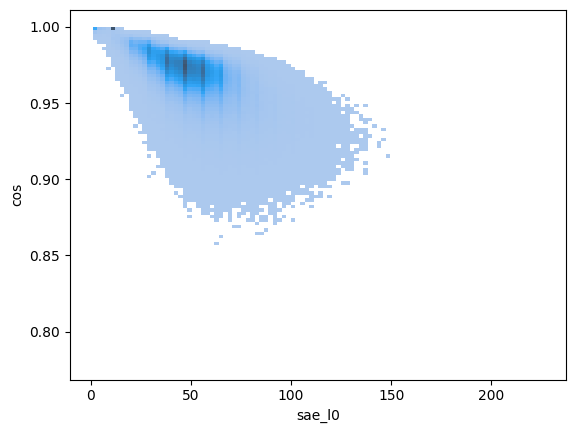

In [96]:
sns.histplot(rdf, x='sae_l0', y='cos', bins=100, thresh=3)

In [38]:
rdf['reconstruction_error_rounded'] = rdf['reconstruction_error'].round(0)

<Axes: xlabel='sae_l0'>

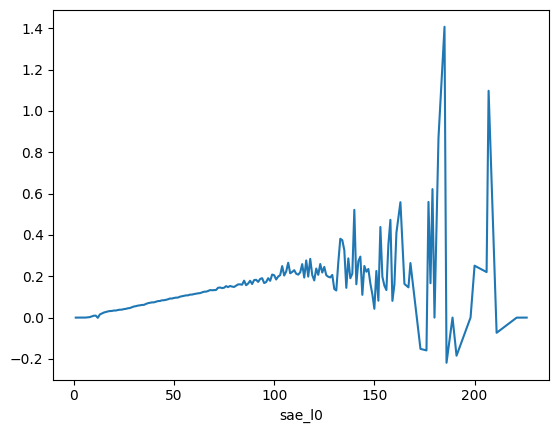

In [41]:
rdf.groupby('sae_l0').abs_kl_gap.mean().plot()

<Axes: xlabel='reconstruction_error_rounded'>

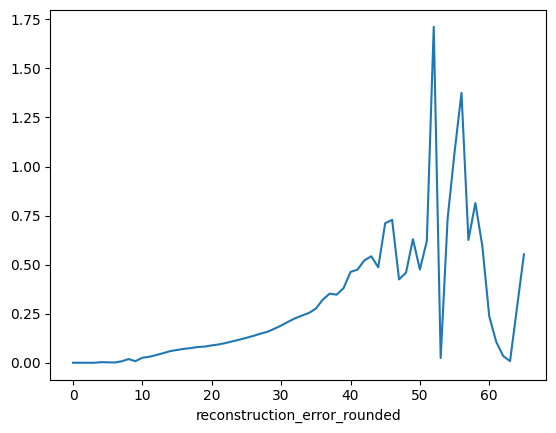

In [39]:
rdf.groupby('reconstruction_error_rounded').abs_kl_gap.mean().plot()

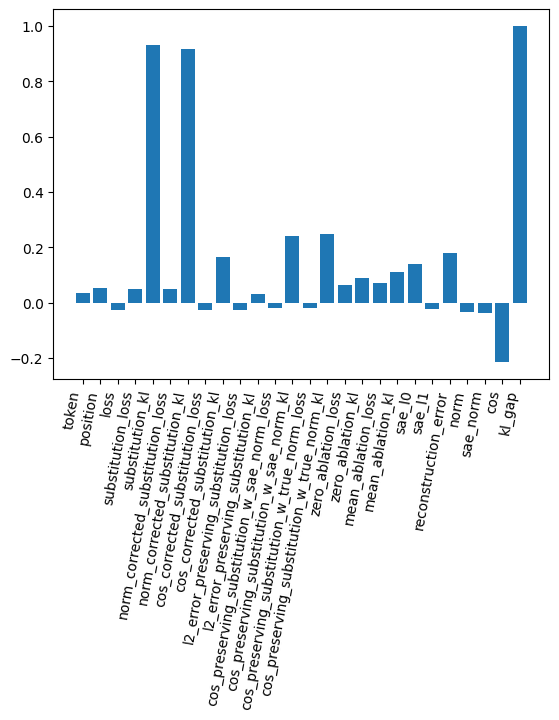

In [ ]:
plt.bar(kl_gap_corr.index, kl_gap_corr.values)
# rotate x labels 90 degrees
plt.xticks(rotation=80, ha='right');

In [ ]:
# Plots kl gap correlations in different layers

In [71]:
pd.DataFrame({'kl_gap_corr': kl_gap_corr}).style.background_gradient(cmap='coolwarm', axis=None)

In [86]:
# get count, mean, and std
token_kl_gap = rdf.groupby('token').abs_kl_gap.describe(percentiles=None)

In [88]:
layer = 6
sae, model = load_sae(layer)

Loaded pretrained model gpt2-small into HookedTransformer
Moving model to device:  cuda


/home/wesg/research/mats_sae_training/.venv/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning:

The repository for Skylion007/openwebtext contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/Skylion007/openwebtext
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.



Dataset is not tokenized! Updating config.
Run name: 24576-L1-8e-05-LR-0.0004-Tokens-3.000e+08
n_tokens_per_buffer (millions): 0.524288
Lower bound: n_contexts_per_buffer (millions): 0.004096
Total training steps: 73242
Total wandb updates: 732
n_tokens_per_feature_sampling_window (millions): 524.288
n_tokens_per_dead_feature_window (millions): 2621.44
Using Ghost Grads.
We will reset the sparsity calculation 73 times.
Number tokens in sparsity calculation window: 4.10e+06
Run name: 24576-L1-8e-05-LR-0.0004-Tokens-3.000e+08
n_tokens_per_buffer (millions): 0.524288
Lower bound: n_contexts_per_buffer (millions): 0.004096
Total training steps: 73242
Total wandb updates: 732
n_tokens_per_feature_sampling_window (millions): 524.288
n_tokens_per_dead_feature_window (millions): 2621.44
Using Ghost Grads.
We will reset the sparsity calculation 73 times.
Number tokens in sparsity calculation window: 4.10e+06
Run name: 24576-L1-8e-05-LR-0.0004-Tokens-3.000e+08
n_tokens_per_buffer (millions): 0.5

In [89]:
decoded_vocab = {
    t: model.tokenizer.decode(t)
    for t in model.tokenizer.vocab.values()
}

In [90]:
token_kl_gap['token_str'] = token_kl_gap.index.map(lambda x: decoded_vocab[x].replace(' ', '_'))

In [93]:
token_kl_gap.query('count > 5').sort_values('mean', ascending=False).head(20).style.background_gradient(cmap='coolwarm', axis=0)

In [106]:
# only display 3 decimal places
token_kl_gap.query('count >= 5').sort_values('mean', ascending=False).head(20).style.background_gradient(cmap='coolwarm', axis=0)

In [103]:
token_kl_gap.query('count > 5 and mean > 1').sort_values('std', ascending=True).head(20).style.background_gradient(cmap='coolwarm', axis=0)

In [ ]:
token_kl_gap.query('count > 2').corr()

count      mean       std       min       25%       50%       75%  \
count  1.000000 -0.016222 -0.005633 -0.264258 -0.011007 -0.016628 -0.018751   
mean  -0.016222  1.000000  0.799731  0.172406  0.660398  0.774974  0.910198   
std   -0.005633  0.799731  1.000000 -0.162925  0.197486  0.398846  0.668183   
min   -0.264258  0.172406 -0.162925  1.000000  0.298679  0.173336  0.102986   
25%   -0.011007  0.660398  0.197486  0.298679  1.000000  0.815960  0.594229   
50%   -0.016628  0.774974  0.398846  0.173336  0.815960  1.000000  0.800371   
75%   -0.018751  0.910198  0.668183  0.102986  0.594229  0.800371  1.000000   
max    0.205781  0.536826  0.742857 -0.302502  0.127155  0.209206  0.362600   

            max  
count  0.205781  
mean   0.536826  
std    0.742857  
min   -0.302502  
25%    0.127155  
50%    0.209206  
75%    0.362600  
max    1.000000

In [ ]:
token_kl_gap.query('count > 3').groupby('count')['mean'].mean()

count
4.0        0.158719
5.0        0.162517
6.0        0.157816
7.0        0.147758
8.0        0.145273
             ...   
40448.0    0.091248
69682.0    0.042293
72812.0    0.083163
73252.0    0.023797
76242.0    0.111072
Name: mean, Length: 767, dtype: float64

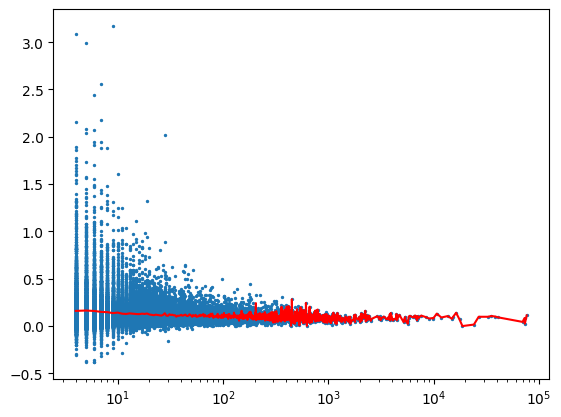

In [44]:
count_average = token_kl_gap.query('count > 3').groupby('count')['mean'].mean()
plt.scatter(token_kl_gap.query('count > 3')['count'], token_kl_gap.query('count > 3')['mean'], s=2)
plt.plot(count_average, zorder=1, color='red')
plt.xscale('log')

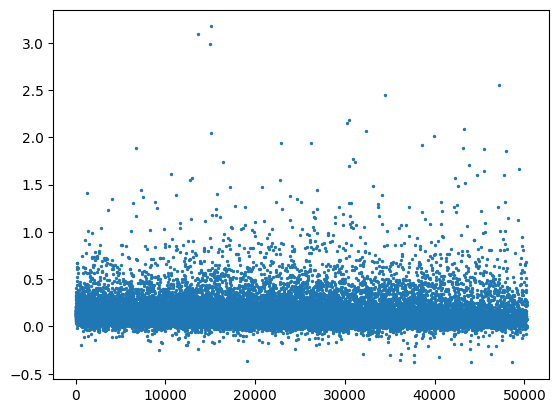

In [50]:
#count_average = token_kl_gap.query('count > 3').groupby('count')['mean'].mean()
plt.scatter(token_kl_gap.query('count > 3').index, token_kl_gap.query('count > 3')['mean'], s=2)
#plt.plot(count_average, zorder=1, color='red')
#plt.xscale('log')

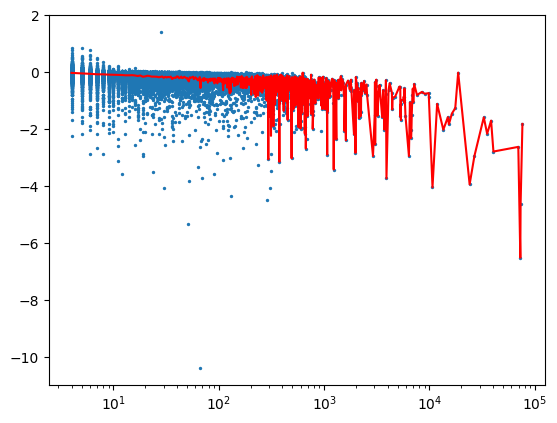

In [47]:
count_average = token_kl_gap.query('count > 3').groupby('count')['min'].mean()
plt.scatter(token_kl_gap.query('count > 3')['count'], token_kl_gap.query('count > 3')['min'], s=2)
plt.plot(count_average, zorder=1, color='red')
plt.xscale('log')

## Single Token Intervention Results

In [10]:
pos = '32'
layers = list(range(12))
sae_name = 'gpt2_resid'

single_token_result_dfs = {}
for i in layers:
    data_path = os.path.join(
        'error_eval_results',
        sae_name,
        f'layer_{i}_pos_{pos}.csv',
    )
    single_token_result_dfs[i] = pd.read_csv(data_path)

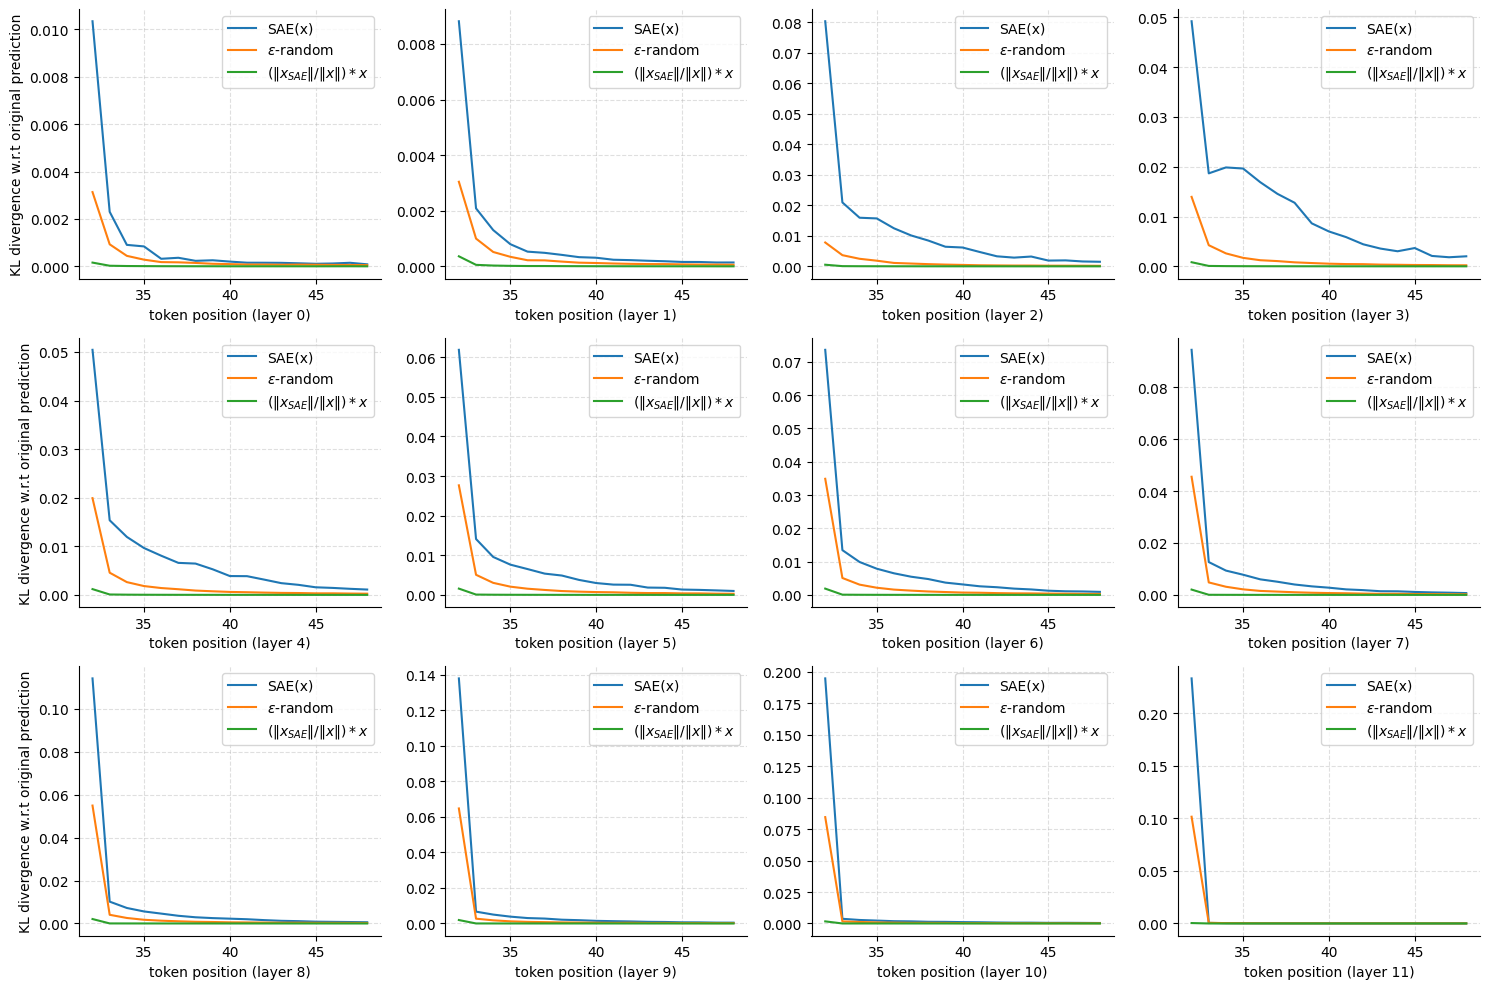

In [11]:
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
for i in range(12):
    ax = axs[i // 4, i % 4]
    rdf = single_token_result_dfs[i]
    kl_by_pos = rdf.query('position >= 32 and position <= 48').groupby('position')[kl_main_cols].mean()
    for col in kl_by_pos.columns:
        ax.plot(kl_by_pos[col], label=kl_col_labels[col])
    ax.legend()    
    format_subplot(ax)
    
    ax.set_xlabel(f'token position (layer {i})')
    if i % 4 == 0:
        ax.set_ylabel('KL divergence w.r.t original prediction')
    

plt.tight_layout()  

In [12]:
single_token_result_dfs[5].head()

token  position      loss  substitution_loss  substitution_kl  \
0  50256         0  8.604523           8.604523              0.0   
1  17402         1  4.787953           4.787953              0.0   
2  22038         2  3.174028           3.174028              0.0   
3   4870         3  2.832820           2.832820              0.0   
4   7806         4  0.000286           0.000286              0.0   

   norm_corrected_substitution_loss  norm_corrected_substitution_kl  \
0                          8.604523                             0.0   
1                          4.787953                             0.0   
2                          3.174028                             0.0   
3                          2.832820                             0.0   
4                          0.000286                             0.0   

   cos_corrected_substitution_loss  cos_corrected_substitution_kl  \
0                         8.604523                            0.0   
1                         4.787953                            0.0   
2                         3.174028                            0.0   
3                         2.832820                            0.0   
4                         0.000286                            0.0   

   l2_error_preserving_substitution_loss  ...  zero_ablation_loss  \
0                               8.604523  ...            8.604523   
1                               4.787953  ...            4.787953   
2                               3.174028  ...            3.174028   
3                               2.832820  ...            2.832820   
4                               0.000286  ...            0.000286   

   zero_ablation_kl  mean_ablation_loss  mean_ablation_kl  sae_l0      sae_l1  \
0               0.0            8.604523               0.0     9.0  2898.96880   
1               0.0            4.787953               0.0    15.0    89.87671   
2               0.0            3.174028               0.0    41.0   135.93878   
3               0.0            2.832820               0.0    42.0   116.46346   
4               0.0            0.000286               0.0    32.0   105.44025   

   reconstruction_error        norm     sae_norm       cos  
0              4.673164  2929.69120  2926.712400  0.999999  
1             13.984047    79.52119    77.109080  0.984529  
2             21.622814    89.75359    91.176100  0.971557  
3             18.996025    85.30570    82.455505  0.974927  
4             16.915197    85.39067    81.447780  0.980548  

[5 rows x 25 columns]

In [13]:
single_token_result_dfs[5].query('position == 5').mean()

token                                           4412.002562
position                                           5.000000
loss                                               4.612622
substitution_loss                                  4.612622
substitution_kl                                    0.000000
norm_corrected_substitution_loss                   4.612622
norm_corrected_substitution_kl                     0.000000
cos_corrected_substitution_loss                    4.612622
cos_corrected_substitution_kl                      0.000000
l2_error_preserving_substitution_loss              4.612622
l2_error_preserving_substitution_kl                0.000000
cos_preserving_substitution_w_sae_norm_loss        4.663866
cos_preserving_substitution_w_sae_norm_kl          0.062193
cos_preserving_substitution_w_true_norm_loss       4.660967
cos_preserving_substitution_w_true_norm_kl         0.058261
zero_ablation_loss                                 4.612622
zero_ablation_kl                        

In [14]:
print(i)

11


In [15]:
i = 5
rdf = single_token_result_dfs[i]
loss_by_pos = rdf.groupby('position')[[c for c in rdf.columns if 'kl' in c and 'zero' not in c and 'mean' not in c]].mean()
px.line(loss_by_pos, title="KL by position").show()

Text(0.5, 1.02, 'Average KL divergence of prediction with token 32 resid stream subsitution on token 32')

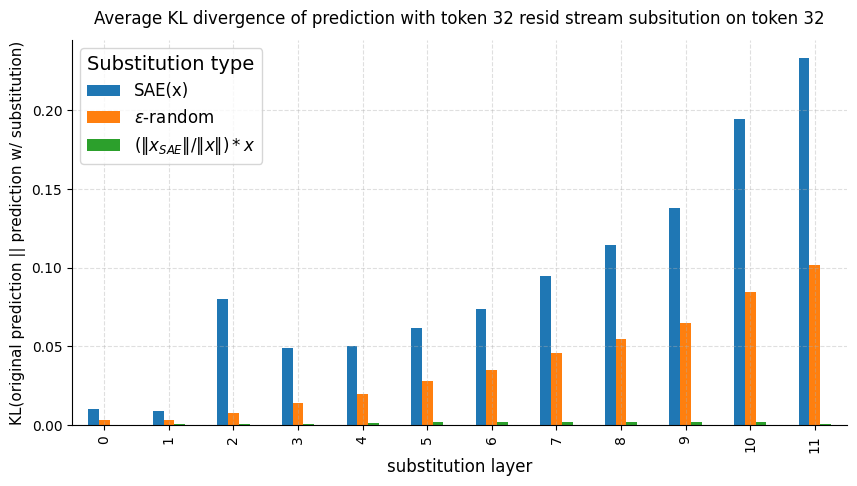

In [54]:
from plots import *
kl_main_cols = ['substitution_kl', 'l2_error_preserving_substitution_kl', 'cos_corrected_substitution_kl']
token_32_dfs = {l: single_token_result_dfs[l].query('position == 32') for l in layers}
fig, ax = plot_layerwise_kl_average(token_32_dfs, list(range(12)), kl_main_cols, kl_col_labels)
ax.set_title('Average KL divergence of prediction with token 32 resid stream subsitution on token 32', y=1.02)

Text(0.5, 1.02, 'Average KL divergence of prediction with token 32 resid stream subsitution on token 33')

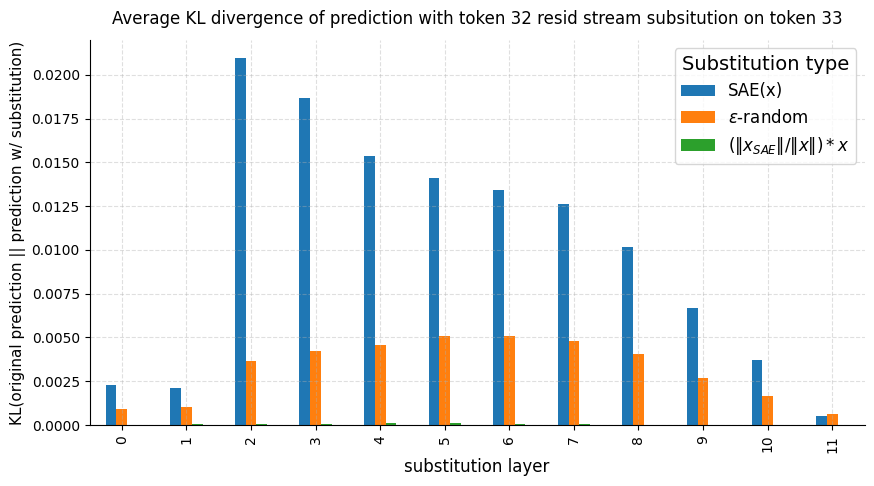

In [55]:
token_33_dfs = {l: single_token_result_dfs[l].query('position == 33') for l in layers}
fig, ax = plot_layerwise_kl_average(token_33_dfs, list(range(12)), kl_main_cols, kl_col_labels)
ax.set_title('Average KL divergence of prediction with token 32 resid stream subsitution on token 33', y=1.02)

## Repeat samples 

In [40]:
pos = '48'
layers = [6]#list(range(12))
sae_name = 'gpt2_resid_pre'

single_token_repeat_result_dfs = {}
for i in layers:
    data_path = os.path.join(
        'error_eval_results',
        sae_name,
        f'layer_{i}_pos_{pos}.csv',
    )
    single_token_repeat_result_dfs[i] = pd.read_csv(data_path)

In [43]:
strdf = single_token_repeat_result_dfs[6]

In [49]:
t = einops.repeat(np.arange(64), 'seq -> r seq pos', r=500, pos=128)

In [55]:
t.shape

(500, 64, 128)

In [61]:
strdf['sequence'] = einops.repeat(np.arange(64), 'seq -> r seq pos', r=500, pos=127).flatten()

In [68]:
strdf.query('position == 48').groupby('sequence')[kl_main_cols].mean()

substitution_kl  l2_error_preserving_substitution_kl  \
sequence                                                         
0                0.023657                             0.040322   
1                0.162730                             0.047799   
2                0.030556                             0.015361   
3                0.005607                             0.007657   
4                0.027543                             0.018747   
...                   ...                                  ...   
59               0.022054                             0.025692   
60               0.204952                             0.041535   
61               0.010532                             0.025989   
62               0.034163                             0.024924   
63               0.021374                             0.008315   

          cos_corrected_substitution_kl  
sequence                                 
0                              0.000292  
1                              0.001269  
2                              0.001021  
3                              0.000352  
4                              0.001600  
...                                 ...  
59                             0.000139  
60                             0.000103  
61                             0.001911  
62                             0.000213  
63                             0.000607  

[64 rows x 3 columns]

In [67]:
strdf.query('position == 48 and sequence == 3')[kl_main_cols]

substitution_kl  l2_error_preserving_substitution_kl  \
429             0.005607                             0.006151   
8557            0.005607                             0.009530   
16685           0.005607                             0.003730   
24813           0.005607                             0.006619   
32941           0.005607                             0.007940   
...                  ...                                  ...   
4023789         0.005607                             0.003873   
4031917         0.005607                             0.004452   
4040045         0.005607                             0.005451   
4048173         0.005607                             0.008739   
4056301         0.005607                             0.004885   

         cos_corrected_substitution_kl  
429                           0.000352  
8557                          0.000352  
16685                         0.000352  
24813                         0.000352  
32941                         0.000352  
...                                ...  
4023789                       0.000352  
4031917                       0.000352  
4040045                       0.000352  
4048173                       0.000352  
4056301                       0.000352  

[500 rows x 3 columns]

In [73]:
64 / 6

10.666666666666666

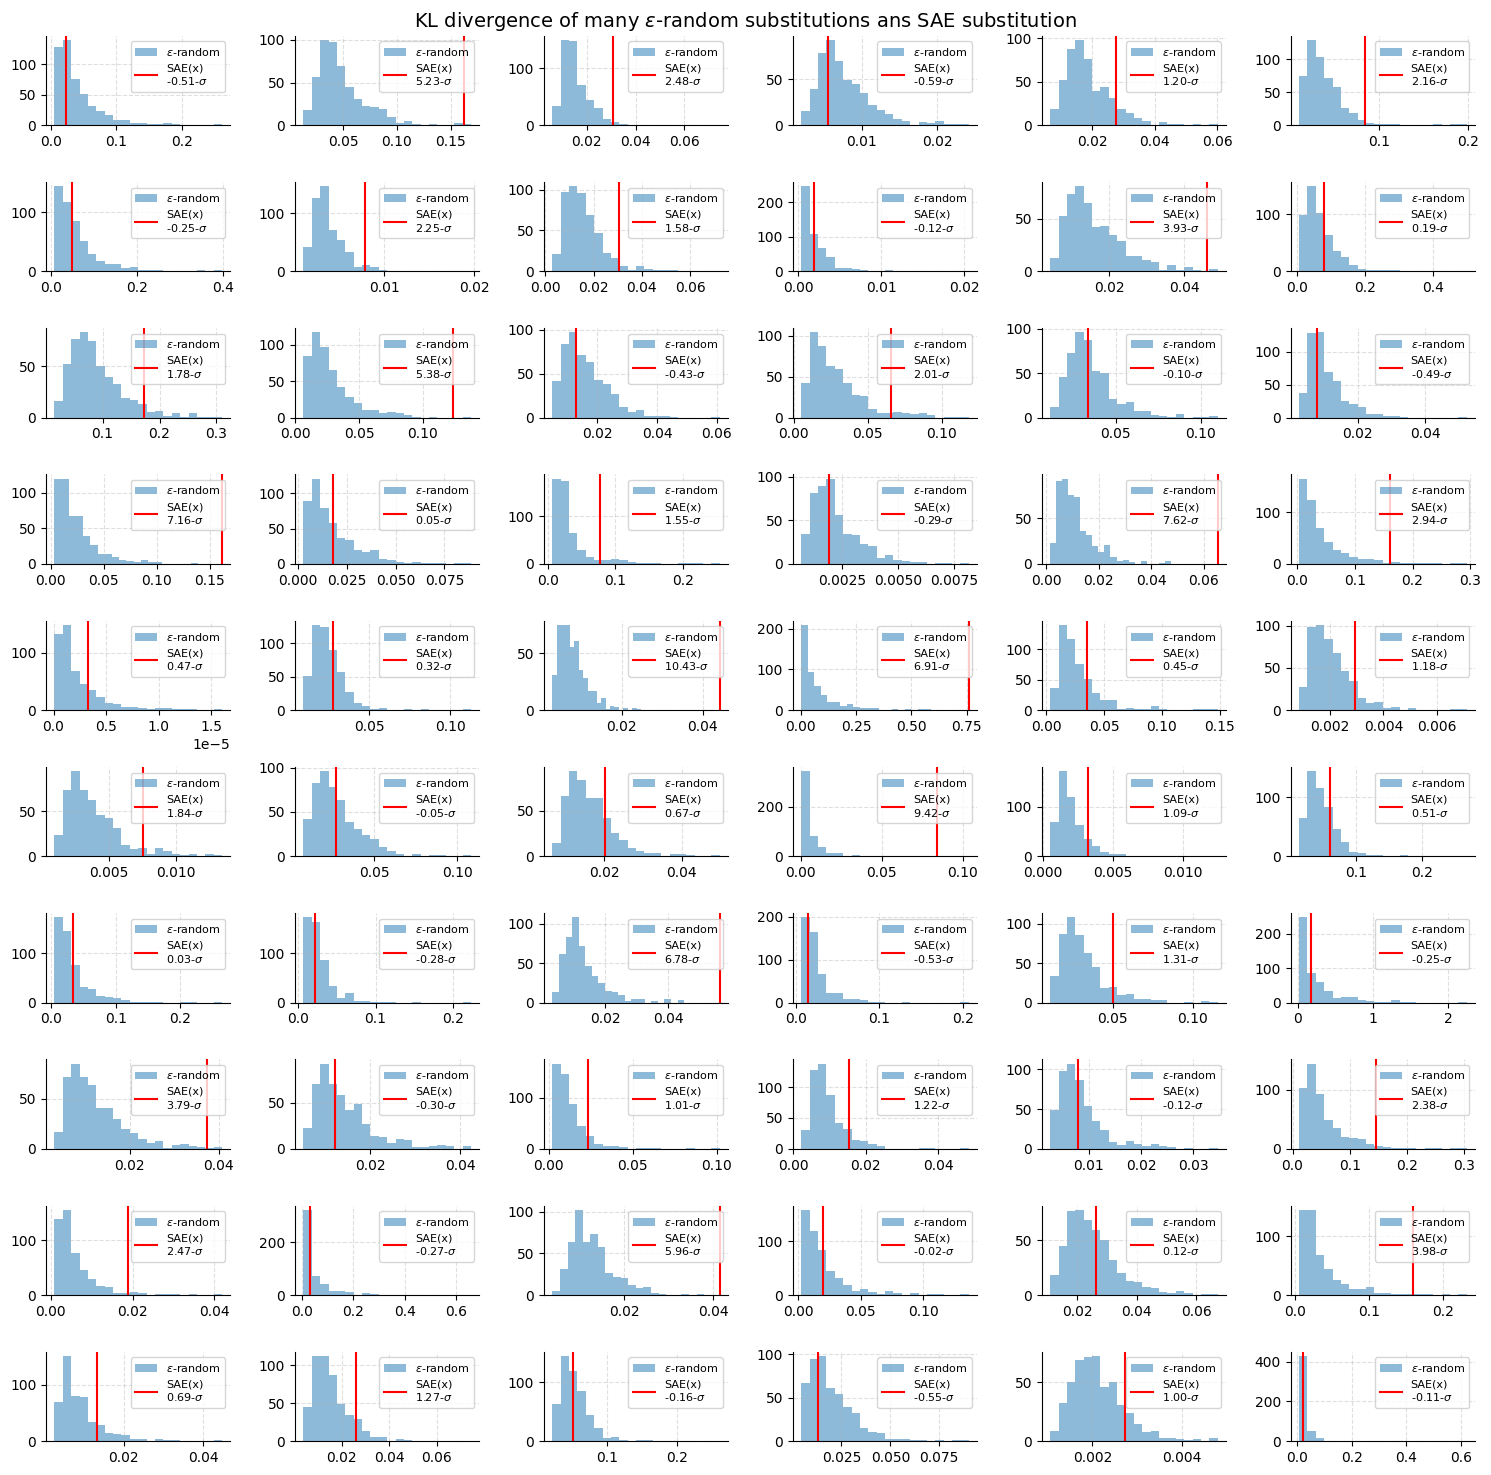

In [87]:
n_rows = 10
n_cols = 6
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 15))
for i in range(n_rows * n_cols):
    ax = axs[i // n_cols, i % n_cols]
    rdf = strdf.query('position == 48 and sequence == @i')
    ax.hist(rdf['l2_error_preserving_substitution_kl'], bins=20, alpha=0.5, label='$\epsilon$-random')
    sub_sigma = (rdf['substitution_kl'].mean() - rdf['l2_error_preserving_substitution_kl'].mean()) / rdf['l2_error_preserving_substitution_kl'].std()
    ax.axvline(rdf['substitution_kl'].mean(), color='red', label=f'SAE(x)\n{sub_sigma:.2f}-$\sigma$')
    #ax.legend()    
    format_subplot(ax)
    ax.legend(loc='upper right', fontsize=8)
plt.suptitle('KL divergence of many $\epsilon$-random substitutions and SAE substitution', fontsize=14)
plt.tight_layout()
    

In [ ]:
# sub - random.mean()

In [18]:
rdf = result_dfs[6]

In [19]:
rdf['kl_diff'] = rdf['substitution_kl'] - rdf['l2_error_preserving_substitution_kl']

In [20]:
corr_df = rdf.corr()

In [21]:
# imshow with no x labels
fig = px.imshow(corr_df)
fig.update_xaxes(showticklabels=False)
fig.show()


## Attn SAEs

In [16]:
pos = 'all'
layers = list(range(12))
sae_name = 'gpt2_z'

attn_result_dfs = {}
for i in layers:
    data_path = os.path.join(
        'error_eval_results',
        sae_name,
        f'layer_{i}_pos_{pos}.csv',
    )
    attn_result_dfs[i] = pd.read_csv(data_path)

Text(0.5, 1.02, 'Average KL divergence of prediction with attention-z subsitution (all tokens; 1 layer)')

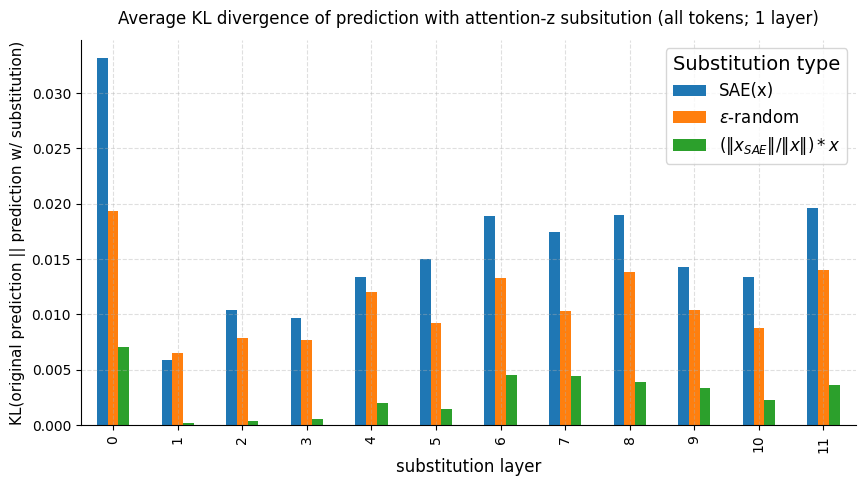

In [17]:
from plots import *
kl_main_cols = ['substitution_kl', 'l2_error_preserving_substitution_kl', 'cos_corrected_substitution_kl']
fig, ax = plot_layerwise_kl_average(attn_result_dfs, list(range(12)), kl_main_cols, kl_col_labels)
ax.set_title('Average KL divergence of prediction with attention-z subsitution (all tokens; 1 layer)', y=1.02)

In [18]:
attn_mean_df = pd.DataFrame({
        l: attn_result_dfs[l].mean(axis=0) for l in layers
    }).T

In [20]:
attn_mean_df['substitution_kl'] / attn_mean_df['l2_error_preserving_substitution_kl']

0     1.714568
1     0.895413
2     1.332477
3     1.259240
4     1.111992
5     1.623644
6     1.418286
7     1.687473
8     1.366574
9     1.378285
10    1.529535
11    1.399014
dtype: float64

In [50]:
token_32_mean_df = pd.DataFrame({
    l: single_token_result_dfs[l].query('position == 32').mean(axis=0) for l in layers
}).T

In [52]:
token_32_mean_df['substitution_kl'] / token_32_mean_df['l2_error_preserving_substitution_kl']

0      3.299450
1      2.896142
2     10.277640
3      3.527964
4      2.532958
5      2.236471
6      2.110721
7      2.074379
8      2.078440
9      2.130780
10     2.304266
11     2.295691
dtype: float64

In [53]:
token_33_mean_df = pd.DataFrame({
    l: single_token_result_dfs[l].query('position == 33').mean(axis=0) for l in layers
}).T

token_33_mean_df['substitution_kl'] / token_33_mean_df['l2_error_preserving_substitution_kl']

0     2.473680
1     2.085987
2     5.723697
3     4.398224
4     3.358750
5     2.777723
6     2.644269
7     2.630352
8     2.514280
9     2.470872
10    2.264640
11    0.863641
dtype: float64

In [56]:
mean_df['substitution_kl'] / token_32_mean_df['substitution_kl']

0     1.889989
1     2.492193
2     0.904201
3     3.330353
4     2.738782
5     2.477422
6     2.116205
7     1.767386
8     1.475101
9     1.265534
10    1.145579
11    1.063889
Name: substitution_kl, dtype: float64

In [57]:
mean_df['l2_error_preserving_substitution_kl'] / token_32_mean_df['l2_error_preserving_substitution_kl']

0     2.268365
1     2.600144
2     3.417979
3     2.601030
4     2.258763
5     2.002753
6     1.762630
7     1.510140
8     1.336626
9     1.186125
10    1.155772
11    0.997272
Name: l2_error_preserving_substitution_kl, dtype: float64